In [374]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp 
import scipy.stats as stat
import math
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score

In [375]:
dataset = pd.read_csv('input_game.csv')
dataset['p1_action'].replace(['TRUST','CHEAT'],[1,0],inplace=True)
dataset['p2_action'].replace(['TRUST','CHEAT'],[1,0],inplace=True)
display(dataset.head())
print(dataset.shape)

,game_id,p1_id,p2_id,p1_action,p2_action,turn
0,0,174,125,1,0,1
1,0,174,125,0,1,2
2,0,174,125,1,1,3
3,0,174,125,1,1,4
4,0,174,125,1,1,5


(180406, 6)


In [376]:
data_np = (dataset.iloc[1:,:]).to_numpy()
print(data_np[1:5,:])


[[  0 174 125   1   1   3]
 [  0 174 125   1   1   4]
 [  0 174 125   1   1   5]
 [  0 174 125   1   1   6]]


In [377]:
player_data = []
for i in range(202):
    player_data.append([])

In [378]:
curr=-1
p1=0;p2=0
prev=[]
num_row = data_np.shape[0]
for i in range(num_row):
    data = data_np[i]
    if data[0]!=curr:
        curr=data[0]; p1=data[1]; p2=data[2]
        player_data[p1].append([0,0,0,0,0,0,0,0,0,0]); player_data[p2].append([0,0,0,0,0,0,0,0,0,0])
        player_data[p1][-1][0] = i; player_data[p2][-1][0] = i
        player_data[p1][-1][1]=p2; player_data[p2][-1][1]=p1
        player_data[p1][-1][2]=data[3]; player_data[p1][-1][3]=data[4]
        player_data[p2][-1][2]=data[4]; player_data[p2][-1][3]=data[3]
        player_data[p1][-1][4]+=1; player_data[p2][-1][4]+=1
        
    else:
        if prev[4]==1 and data[3]==1:
            player_data[p1][-1][5]+=1
        elif prev[4]==0 and data[3]==1:
            player_data[p1][-1][6]+=1
        elif prev[4]==0 and data[3]==0:
            player_data[p1][-1][7]+=1
        elif prev[4]==1 and data[3]==0:
            player_data[p1][-1][8]+=1
        else:
            {}
            
            
        if prev[3]==1 and data[4]==1:
            player_data[p2][-1][5]+=1
        elif prev[3]==0 and data[4]==1:
            player_data[p2][-1][6]+=1
        elif prev[3]==0 and data[4]==0:
            player_data[p2][-1][7]+=1
        elif prev[3]==1 and data[4]==0:
            player_data[p2][-1][8]+=1
        else:
            {}
            
        player_data[p1][-1][4]+=1; player_data[p2][-1][4]+=1
            
    prev=data

In [379]:
print(player_data[3])

[[6888, 69, 1, 1, 61, 48, 7, 1, 4, 0], [8237, 199, 1, 1, 66, 63, 1, 0, 1, 0], [25916, 2, 1, 1, 53, 46, 2, 0, 4, 0], [27181, 194, 1, 1, 62, 57, 0, 0, 4, 0], [28115, 8, 1, 1, 61, 43, 14, 2, 1, 0], [29355, 118, 1, 1, 77, 64, 5, 2, 5, 0], [29759, 88, 1, 1, 73, 25, 6, 41, 0, 0], [32701, 37, 1, 1, 51, 45, 2, 1, 2, 0], [41021, 40, 1, 0, 78, 33, 20, 20, 4, 0], [48584, 160, 1, 1, 55, 34, 7, 12, 1, 0], [48816, 65, 1, 1, 66, 61, 2, 0, 2, 0], [49397, 102, 0, 1, 71, 33, 19, 14, 4, 0], [63631, 85, 1, 1, 72, 6, 9, 55, 1, 0], [79108, 10, 1, 0, 55, 26, 9, 15, 4, 0], [101952, 68, 1, 0, 63, 23, 13, 24, 2, 0], [110764, 170, 1, 1, 63, 29, 12, 20, 1, 0], [111894, 168, 1, 1, 61, 29, 1, 29, 1, 0], [123518, 7, 1, 0, 80, 67, 9, 0, 3, 0], [132989, 91, 1, 0, 40, 9, 5, 25, 0, 0], [140555, 58, 1, 1, 66, 49, 2, 12, 2, 0], [140745, 131, 1, 1, 70, 62, 1, 0, 6, 0], [141407, 84, 1, 0, 59, 24, 9, 25, 0, 0], [146328, 195, 1, 1, 42, 21, 9, 11, 0, 0], [147203, 43, 1, 0, 75, 46, 15, 6, 7, 0], [150711, 49, 1, 1, 79, 35, 20, 2

In [380]:
player_sum = np.zeros((202,10),dtype=float)
for i in range(1,202):
    for j in range(len(player_data[i])):
        
        if player_data[i][j][2]==0:
            player_sum[i][4]+=1
        else:
            player_sum[i][5]+=1
            
        for k in range(4):
            player_sum[i][k]+=player_data[i][j][5+k]
            
print(player_sum)

[[   0.    0.    0. ...    0.    0.    0.]
 [ 796.  306.  594. ...    0.    0.    0.]
 [1088.  245.  364. ...    0.    0.    0.]
 ...
 [1056.  282.  387. ...    0.    0.    0.]
 [ 686.   99.  766. ...    0.    0.    0.]
 [ 618.  277.  279. ...    0.    0.    0.]]


In [381]:
for i in range(1,202):
    num_a =0; den_a=1; num_b=0;  den_b=1; num_c=0; den_c=1; num_d=0; den_d=1; counter=0; prev = 0
    for game in player_data[i]:
        ind = game[0]
        # ind = data_np[:0].searchsorted(game_num)
        game_num=data_np[ind][0]
        
        p_ind=0
        if data_np[ind][1]==i:
            p_ind=3
        else:
            p_ind=4
            
        o_ind = 7-p_ind
        
            
        p_act=data_np[ind][p_ind] ; o_act = data_np[ind][o_ind]
        
        round = ind
        while data_np[round][0]==game_num:
            new_p_act = data_np[round][p_ind]; new_o_act = data_np[round][o_ind]
            
            if o_act == 1 and new_p_act==1:
                if prev==1:
                    counter+=1
                else:
                    num_c+=counter; den_c+=1
                    prev =1; counter=1
                    
            elif o_act==0 and new_p_act==1:
                if prev==4:
                    counter+=1
                else:
                    num_b+=counter; den_b+=1
                    prev =4; counter=1
                
            elif o_act==1 and new_p_act==0:
                if prev==3:
                    counter+=1
                else:
                    num_a+=counter; den_a+=1
                    prev =3; counter=1
                
            elif o_act==0 and new_p_act==0:
                if prev==2:
                    counter+=1
                else:
                    num_d+=counter; den_d+=1
                    prev =2; counter=1
            
            
            p_act = new_p_act; o_act=new_o_act
            round+=1
            
            if round==num_row:
                break
            
    player_sum[i][6]=num_a/den_a
    player_sum[i][7]=num_b/den_b
    player_sum[i][8]=num_c/den_c
    player_sum[i][9]=num_d/den_d
            
        
    

In [382]:
for i in range(1,202):
    vec = player_sum[i]
    a=vec[0];b=vec[1];c=vec[2];d=vec[3]; e=vec[4];f=vec[5]
    player_sum[i][0]=a/(a+d)
    player_sum[i][3]=d/(a+d)
    player_sum[i][1]=b/(b+c)
    player_sum[i][2]=c/(b+c)
    player_sum[i][4]=e/(e+f)
    player_sum[i][5]=f/(e+f)
    
player_sum = player_sum[1:,:]
print(player_sum[0:5])

[[0.74184529 0.34       0.66       0.25815471 0.96875    0.03125
  3.63636364 4.96969697 1.75524476 2.39655172]
 [0.95859031 0.40229885 0.59770115 0.04140969 0.1        0.9
  5.22916667 3.65560166 1.81853282 1.25      ]
 [0.94485842 0.37707391 0.62292609 0.05514158 0.03125    0.96875
  7.09589041 3.42436975 1.70967742 1.36363636]
 [0.04613095 0.04096639 0.95903361 0.95386905 0.93103448 0.06896552
  2.37328767 6.         3.25       2.02287582]
 [0.57619048 0.53045923 0.46954077 0.42380952 0.96774194 0.03225806
  2.3632287  3.63829787 2.75352113 2.37735849]]


/home/sarthak/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sarthak/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sarthak/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sarthak/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

[2010.0000000000007, 1460.1859230387954, 1113.4612941519729, 812.5638691818599, 661.0207565123576, 521.0575951688891, 389.10054894604116, 317.73784764958, 259.60457634085674, 224.886437117146, 191.67631532041315, 166.8047548790926, 144.6490621930794, 129.93721072003189, 115.9889677765957, 107.45893736793369, 103.6670760000569, 95.95541805782031, 90.48549408924058, 85.6992022557642, 84.30447240638046, 78.55163710411914, 75.26048635702297, 71.83935764615886, 69.14038666158338, 68.26355252772356, 65.41447809523042, 61.055280899882675, 59.70556523051104]


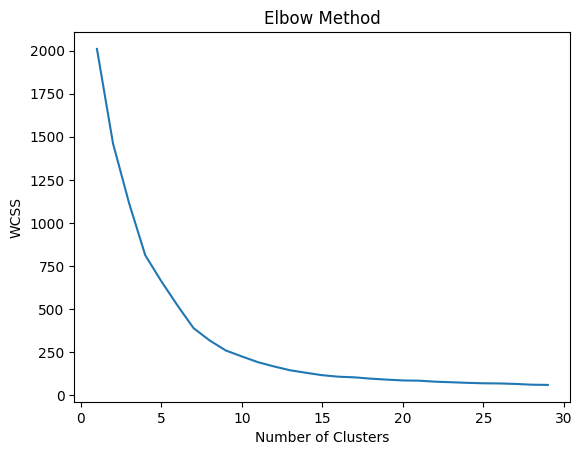

/home/sarthak/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [383]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(player_sum)

wcss = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
print(wcss)

plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.xlim
plt.ylabel('WCSS')
plt.show()

# ssd = []
# for k in range(2, 9):
#     kmeans_model = KMeans(n_clusters=k)
#     kmeans_model.fit(player_sum)
#     ssd.append(kmeans_model.inertia_)
# plt.figure(figsize=(6, 4), dpi=100)
# plt.plot(range(2, 9), ssd, color="green", marker="o")
# plt.xlabel("Number of clusters (K)")
# plt.ylabel("SSD for K")
# plt.show()


kmeans_model = KMeans(n_clusters=9)
clusters = kmeans_model.fit_predict(player_sum)

In [384]:
#As from elbow graph we can see sudden change in drop at 9 clusters, thus total number of unique strategies is 9 only

In [385]:
clusters

array([0, 7, 7, 5, 0, 1, 0, 1, 3, 4, 4, 2, 3, 5, 5, 6, 1, 6, 0, 7, 4, 0,
       5, 4, 5, 4, 0, 4, 4, 7, 1, 4, 5, 5, 1, 8, 8, 8, 0, 4, 4, 7, 1, 4,
       2, 1, 1, 4, 4, 4, 1, 1, 8, 4, 8, 0, 0, 0, 4, 3, 1, 4, 1, 5, 8, 4,
       7, 4, 2, 1, 4, 6, 0, 2, 4, 0, 7, 6, 7, 2, 6, 1, 4, 4, 5, 2, 0, 0,
       0, 4, 4, 0, 7, 6, 3, 5, 5, 4, 1, 7, 2, 4, 2, 3, 5, 4, 1, 5, 4, 5,
       5, 4, 7, 4, 5, 6, 4, 7, 4, 4, 3, 6, 4, 4, 4, 7, 1, 3, 5, 4, 0, 4,
       1, 1, 4, 5, 6, 7, 1, 4, 8, 6, 0, 0, 6, 8, 4, 0, 7, 7, 4, 0, 4, 2,
       0, 4, 0, 5, 0, 6, 2, 0, 4, 4, 1, 6, 8, 0, 5, 4, 2, 5, 4, 7, 3, 2,
       1, 3, 7, 8, 0, 5, 0, 4, 0, 1, 4, 0, 8, 7, 1, 3, 3, 3, 1, 1, 0, 4,
       2, 8, 1], dtype=int32)

In [386]:
vec = []
for i in range(9):
    vec.append([])
for i in range(0,len(clusters)):
    vec[clusters[i]].append(i)
    
vec.sort()
print(vec)

[[0, 4, 6, 18, 21, 26, 38, 55, 56, 57, 72, 75, 86, 87, 88, 91, 130, 142, 143, 147, 151, 154, 156, 158, 161, 167, 180, 182, 184, 187, 196], [1, 2, 19, 29, 41, 66, 76, 78, 92, 99, 112, 117, 125, 137, 148, 149, 173, 178, 189], [3, 13, 14, 22, 24, 32, 33, 63, 84, 95, 96, 104, 107, 109, 110, 114, 128, 135, 157, 168, 171, 181], [5, 7, 16, 30, 34, 42, 45, 46, 50, 51, 60, 62, 69, 81, 98, 106, 126, 132, 133, 138, 164, 176, 185, 190, 194, 195, 200], [8, 12, 59, 94, 103, 120, 127, 174, 177, 191, 192, 193], [9, 10, 20, 23, 25, 27, 28, 31, 39, 40, 43, 47, 48, 49, 53, 58, 61, 65, 67, 70, 74, 82, 83, 89, 90, 97, 101, 105, 108, 111, 113, 116, 118, 119, 122, 123, 124, 129, 131, 134, 139, 146, 150, 152, 155, 162, 163, 169, 172, 183, 186, 197], [11, 44, 68, 73, 79, 85, 100, 102, 153, 160, 170, 175, 198], [15, 17, 71, 77, 80, 93, 115, 121, 136, 141, 144, 159, 165], [35, 36, 37, 52, 54, 64, 140, 145, 166, 179, 188, 199]]
